In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from scipy.spatial.distance import pdist, squareform
from scipy.spatial import distance_matrix
from itertools import permutations, combinations
from math import comb
import numpy as np
from timeit import default_timer as timer
import sys
sys.path.insert(0, '/home/kurk/curse/filtration/graph_func.cpython-312-x86_64-linux-gnu.so')

import graph_func as gf
import importlib
importlib.reload(gf)
from timeit import default_timer as timer

from sklearn.neighbors import radius_neighbors_graph
import networkx as nx


print(gf.__file__)
print(gf.filtrate.__doc__)

/home/krakazabra/work/curse/NetLibpp/testing/graph_func.cpython-312-x86_64-linux-gnu.so
filtrate(A: numpy.ndarray[numpy.float64], n: int, p: numpy.ndarray[numpy.float64], threads: int) -> numpy.ndarray[numpy.float64]

filter complex



In [2]:
X = np.array([
    [0, 2.75], # 1
    [2, 2], # 2
    [3, 2.25], # 3
    [4, 4], #4
    [3.5, 0.75], #5
    [2.5, -0.25], #6
    [2.25, -2.25], #7
    [2.5, -4], #8
    [1, -3], #9
    [-1, -2.75], #10
    [-2.5, -1.0], #11
    [-4, 0.5], #12
    [-2, 1] #13
])

X = X + np.random.normal(0, 0.05, X.shape)
X

array([[-0.06271363,  2.77908299],
       [ 2.01811728,  1.91261975],
       [ 2.95188275,  2.21430352],
       [ 4.00922313,  3.97888875],
       [ 3.48826357,  0.74677007],
       [ 2.51651108, -0.32269891],
       [ 2.17633322, -2.2148859 ],
       [ 2.51033478, -4.05789008],
       [ 0.92802639, -3.10494805],
       [-0.9801288 , -2.64150208],
       [-2.57985646, -1.05114819],
       [-3.938864  ,  0.40421245],
       [-2.10375013,  0.96369354]])

In [3]:
A = radius_neighbors_graph(X, 4.25, mode='distance', include_self=False).toarray() #.astype(int)
G = nx.from_numpy_array(A)
A

array([[0.        , 2.25402214, 3.06704536, 4.24502095, 4.09142211,
        4.03403657, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 2.73156893],
       [2.25402214, 0.        , 0.9812905 , 2.86948951, 1.87630903,
        2.29020651, 4.13053692, 0.        , 0.        , 0.        ,
        0.        , 0.        , 4.22968697],
       [3.06704536, 0.9812905 , 0.        , 2.05711684, 1.56248481,
        2.57408815, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [4.24502095, 2.86948951, 2.05711684, 0.        , 3.27383414,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [4.09142211, 1.87630903, 1.56248481, 3.27383414, 0.        ,
        1.44501447, 3.23922327, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [4.03403657, 2.29020651, 2.57408815, 0.        , 1.44501447,
        0.        , 1.92252

In [4]:
_A = distance_matrix(X, X)
dm = gf.get_VR_from_dist_matrix(_A, 0, 3)
# dm.creat(A, 3)
# dm.as_list()
_A

13 13


array([[0.        , 2.25402214, 3.06704536, 4.24502095, 4.09142211,
        4.03403657, 5.47293853, 7.30512005, 5.96685739, 5.49767161,
        4.58330437, 4.54582795, 2.73156893],
       [2.25402214, 0.        , 0.9812905 , 2.86948951, 1.87630903,
        2.29020651, 4.13053692, 5.99076504, 5.13461632, 5.45247698,
        5.47040062, 6.14499134, 4.22968697],
       [3.06704536, 0.9812905 , 0.        , 2.05711684, 1.56248481,
        2.57408815, 4.49657603, 6.28771637, 5.69125924, 6.24816476,
        6.42365267, 7.12452247, 5.20801778],
       [4.24502095, 2.86948951, 2.05711684, 0.        , 3.27383414,
        4.55322365, 6.45928245, 8.17535811, 7.72492829, 8.28994616,
        8.28958632, 8.71495265, 6.81614585],
       [4.09142211, 1.87630903, 1.56248481, 3.27383414, 0.        ,
        1.44501447, 3.23922327, 4.90317284, 4.62499156, 5.60775522,
        6.32886963, 7.43502318, 5.59621953],
       [4.03403657, 2.29020651, 2.57408815, 4.55322365, 1.44501447,
        0.        , 1.92252

In [5]:
def plot_core(G, K):

    def stack(idx):
        ret = np.empty((0, 2))
        for _id in idx:
            ret = np.vstack((ret, X[_id,:]))
        return ret

    max_dim_K = len(K)

    plt.figure(figsize=(17,4))

    plt.subplot(1, 4, 1)
    plt.xlim((-5, 5))
    plt.ylim((-5, 5))
    plt.grid(linestyle="dotted")
    plt.title("Neighborhood graph$")

    # plot vertices
    plt.scatter(X[:,0], X[:,1])

    for i in range(len(X)):
        plt.annotate(str(i), (X[i][0], X[i][1]))

    # plot edges
    for e in G.edges():
        (start_id, end_id) = e
        plt.plot([X[start_id,0], X[end_id,0]], [X[start_id,1], X[end_id,1]], 'c-', alpha=0.5)

    plt.subplot(1, 4, 3)
    plt.xlim((-5, 5))
    plt.ylim((-5, 5))
    plt.grid(linestyle="dotted")
    plt.title("Vietoris-Rips complex$")

    # plot vertices
    plt.scatter(X[:,0], X[:,1])

    # plot edges
    for e in G.edges():
        (start_id, end_id) = e
        plt.plot([X[start_id,0], X[end_id,0]], [X[start_id,1], X[end_id,1]], 'c-', alpha=0.5)

    # plot triangles
    if max_dim_K >= 3:
        for triangle in K[2]:
            t = plt.Polygon(stack(triangle), color="blue", alpha=0.15)
            plt.gca().add_patch(t)

    # plot tetrahedrons
    if max_dim_K >= 4:
        for tetra in K[3]:
            tt = plt.Polygon(stack(tetra), color="red", alpha=0.15)
            plt.gca().add_patch(tt)

    plt.show()

In [6]:
epsilons = list(np.sort(A[np.tril(A).nonzero()]))
epsilons

[0.9812905046948635,
 1.4450144657824393,
 1.5331277024756513,
 1.5624848108147809,
 1.8471053962399442,
 1.8730246757059061,
 1.8763090338661583,
 1.9185051483131939,
 1.922522459886528,
 1.963628888884966,
 1.9912247743439988,
 2.057116842604241,
 2.070329551492459,
 2.254022144267236,
 2.2557380274332446,
 2.290206514644019,
 2.574088145905239,
 2.7315689329169035,
 2.869489512015344,
 3.067045358226458,
 3.185161508662828,
 3.2037780644798017,
 3.239223266782617,
 3.27383413969576,
 3.735196279461072,
 3.76689407648543,
 3.7762362667574494,
 4.034036567571338,
 4.064890641889697,
 4.091422110593917,
 4.130536916588134,
 4.195633276041486,
 4.229686972922027,
 4.245020947814426,
 4.246232559896997]

13 13


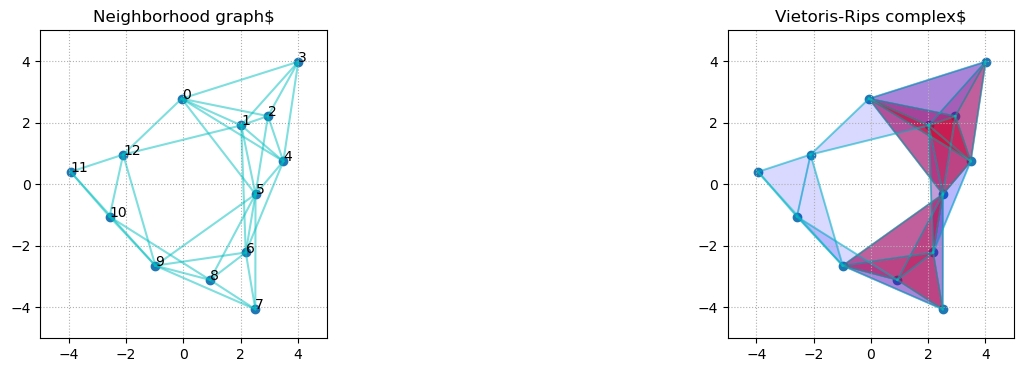

2


array([[0.        , 2.25402214, 3.06704536, 4.24502095, 4.09142211,
        4.03403657, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 2.73156893],
       [2.25402214, 0.        , 0.9812905 , 2.86948951, 1.87630903,
        2.29020651, 4.13053692, 0.        , 0.        , 0.        ,
        0.        , 0.        , 4.22968697],
       [3.06704536, 0.9812905 , 0.        , 2.05711684, 1.56248481,
        2.57408815, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [4.24502095, 2.86948951, 2.05711684, 0.        , 3.27383414,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [4.09142211, 1.87630903, 1.56248481, 3.27383414, 0.        ,
        1.44501447, 3.23922327, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [4.03403657, 2.29020651, 2.57408815, 0.        , 1.44501447,
        0.        , 1.92252

In [7]:
_A = radius_neighbors_graph(X, epsilons[len(epsilons) - 1], mode='distance', include_self=False).toarray()
__A = distance_matrix(X, X)
__K = gf.get_VR_from_dist_matrix(__A, epsilons[len(epsilons) - 1], 4)
_K =  __K.as_list()
plot_core(nx.from_numpy_array(_A), _K)
print(__K.filtration(2)[5].dim())
__K.volume_of(__K.filtration(1)[5])
A

In [8]:
__K = gf.get_Lp_from_coord_matrix(X, 2, 2, 4)
__K.as_list()

[0, 1] 2.0 2.0
0 1
1 0
[0, 2] 2.0 2.0
0 2
2 0
[0, 3] 2.0 2.0
0 3
3 0
[0, 4] 2.0 2.0
0 4
4 0
[0, 5] 2.0 2.0
0 5
5 0
[0, 6] 2.0 2.0
0 6
6 0
[0, 7] 2.0 2.0
0 7
7 0
[0, 8] 2.0 2.0
0 8
8 0
[0, 9] 2.0 2.0
0 9
9 0
[0, 10] 2.0 2.0
0 10
10 0
[0, 11] 2.0 2.0
0 11
11 0
[0, 12] 2.0 2.0
0 12
12 0
[1, 2] 2.0 2.0
1 2
2 1
[1, 3] 2.0 2.0
1 3
3 1
[1, 4] 2.0 2.0
1 4
4 1
[1, 5] 2.0 2.0
1 5
5 1
[1, 6] 2.0 2.0
1 6
6 1
[1, 7] 2.0 2.0
1 7
7 1
[1, 8] 2.0 2.0
1 8
8 1
[1, 9] 2.0 2.0
1 9
9 1
[1, 10] 2.0 2.0
1 10
10 1
[1, 11] 2.0 2.0
1 11
11 1
[1, 12] 2.0 2.0
1 12
12 1
[2, 3] 2.0 2.0
2 3
3 2
[2, 4] 2.0 2.0
2 4
4 2
[2, 5] 2.0 2.0
2 5
5 2
[2, 6] 2.0 2.0
2 6
6 2
[2, 7] 2.0 2.0
2 7
7 2
[2, 8] 2.0 2.0
2 8
8 2
[2, 9] 2.0 2.0
2 9
9 2
[2, 10] 2.0 2.0
2 10
10 2
[2, 11] 2.0 2.0
2 11
11 2
[2, 12] 2.0 2.0
2 12
12 2
[3, 4] 2.0 2.0
3 4
4 3
[3, 5] 2.0 2.0
3 5
5 3
[3, 6] 2.0 2.0
3 6
6 3
[3, 7] 2.0 2.0
3 7
7 3
[3, 8] 2.0 2.0
3 8
8 3
[3, 9] 2.0 2.0
3 9
9 3
[3, 10] 2.0 2.0
3 10
10 3
[3, 11] 2.0 2.0
3 11
11 3
[3, 12] 2.0 2.0
3 12
12 

[[],
 [[1, 2],
  [1, 4],
  [2, 4],
  [4, 5],
  [5, 6],
  [6, 7],
  [6, 8],
  [7, 8],
  [8, 9],
  [10, 11],
  [11, 12]],
 [[1, 2, 4], [6, 7, 8]]]

Graph with 13 nodes and 1 edges
13 2


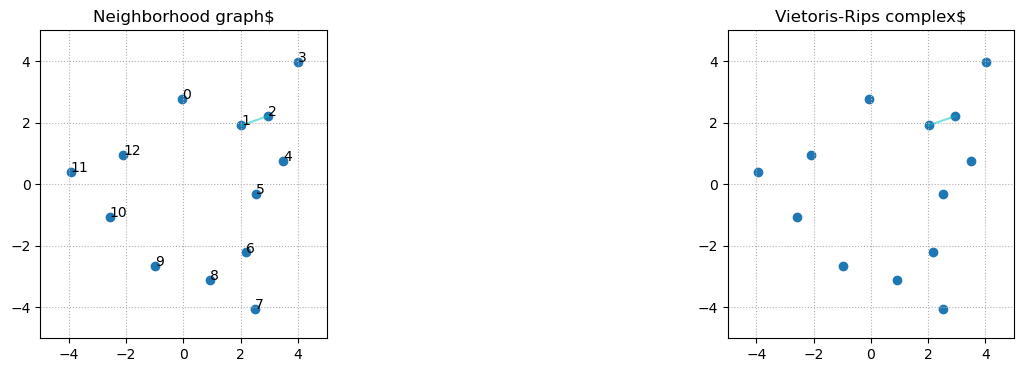

Graph with 13 nodes and 2 edges
13 2


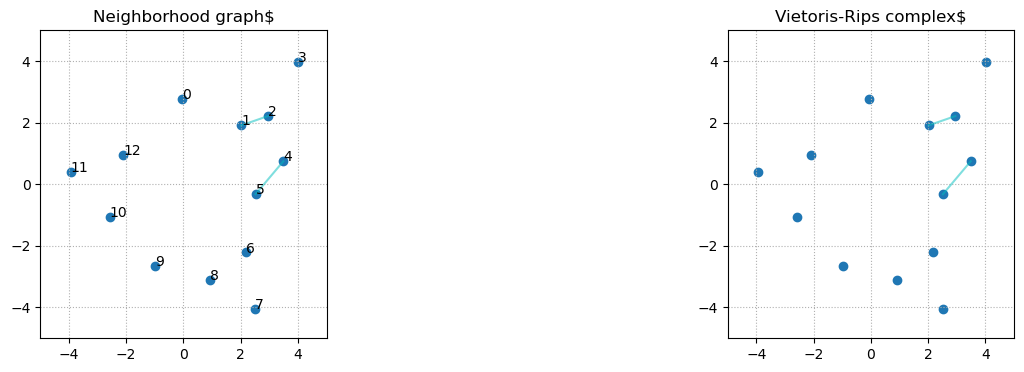

Graph with 13 nodes and 3 edges
13 2


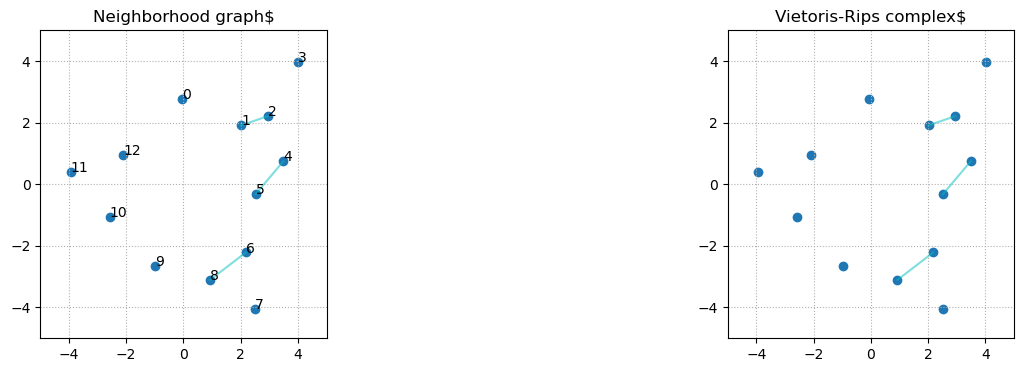

Graph with 13 nodes and 3 edges
13 2


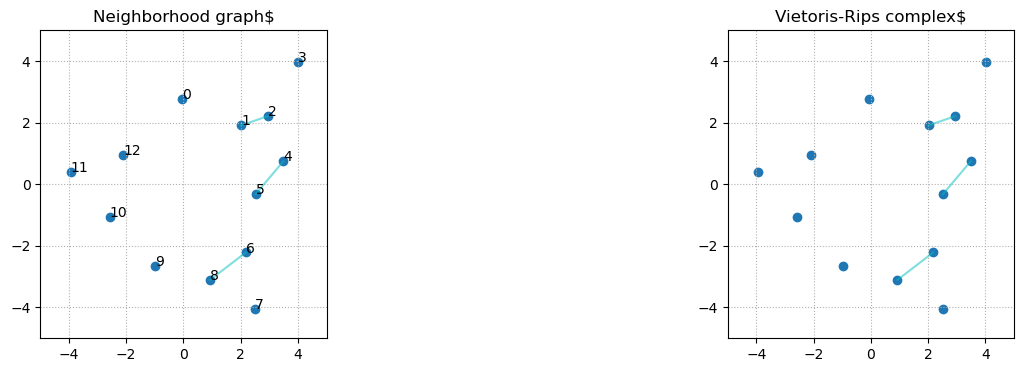

Graph with 13 nodes and 5 edges
13 2


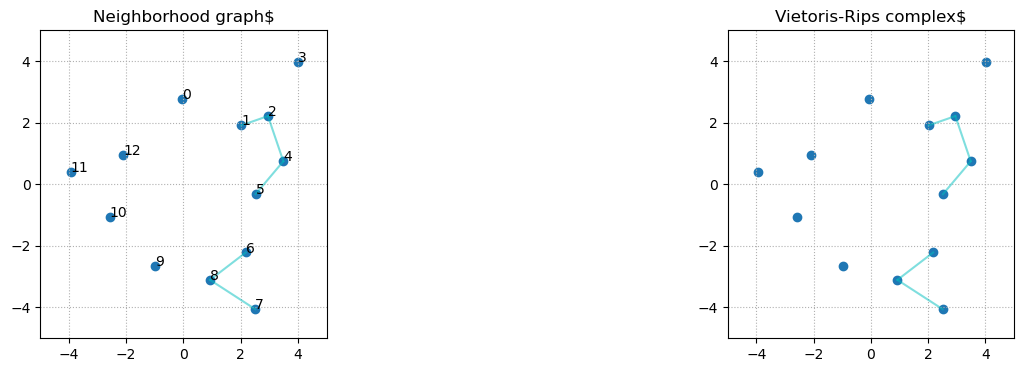

Graph with 13 nodes and 5 edges
13 2


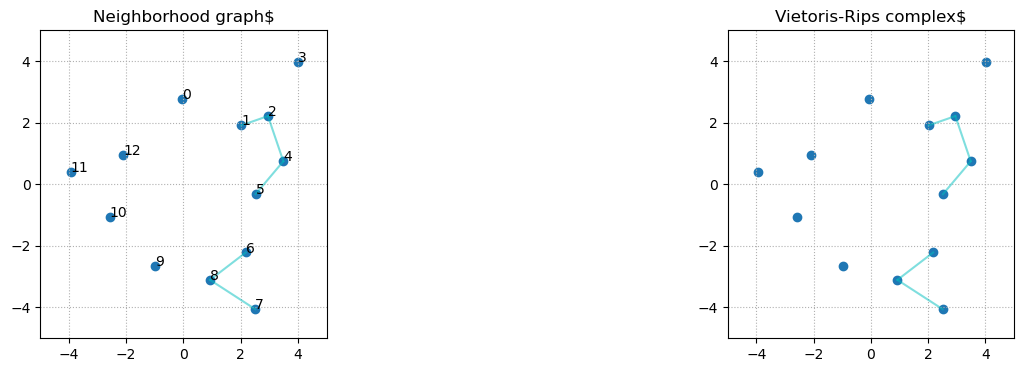

Graph with 13 nodes and 7 edges
13 2


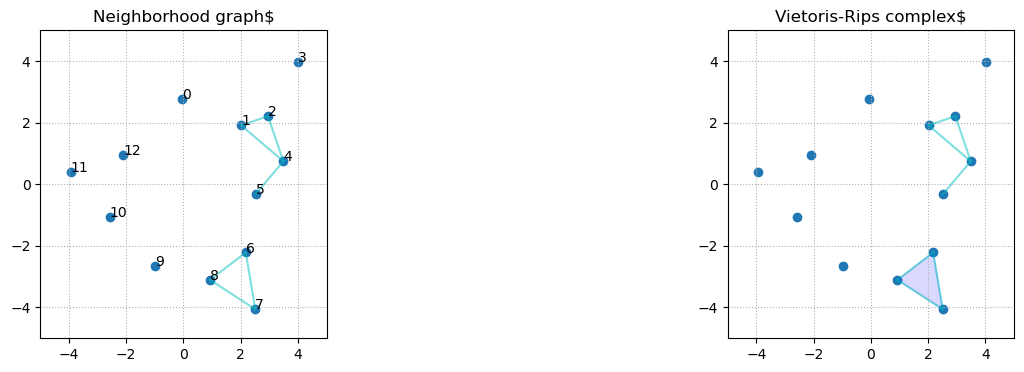

Graph with 13 nodes and 7 edges
13 2


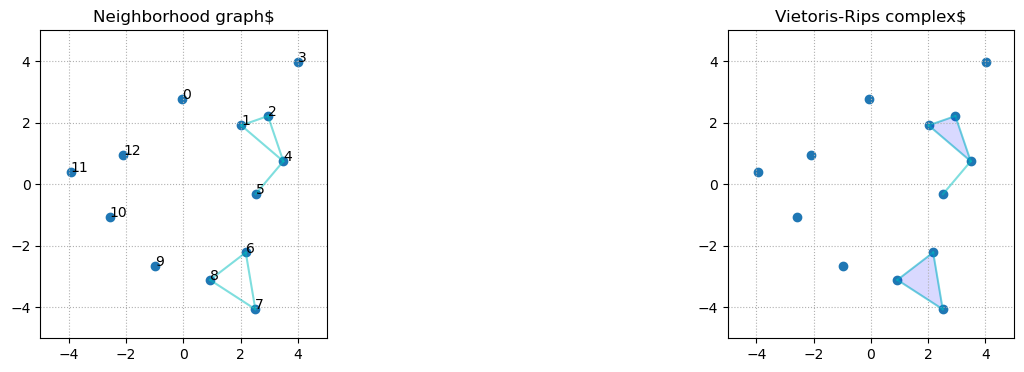

Graph with 13 nodes and 8 edges
13 2


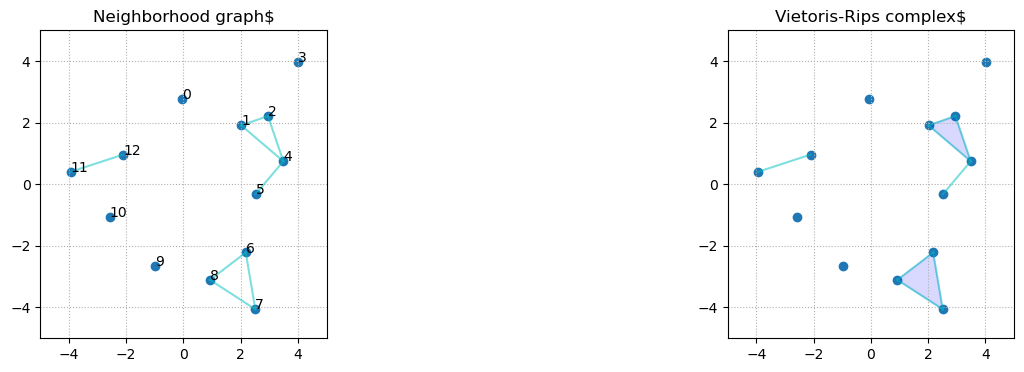

Graph with 13 nodes and 10 edges
13 2


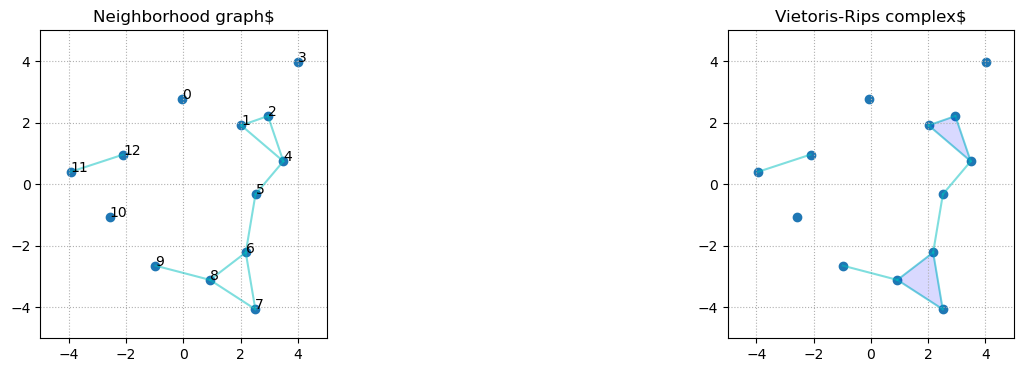

Graph with 13 nodes and 11 edges
13 2


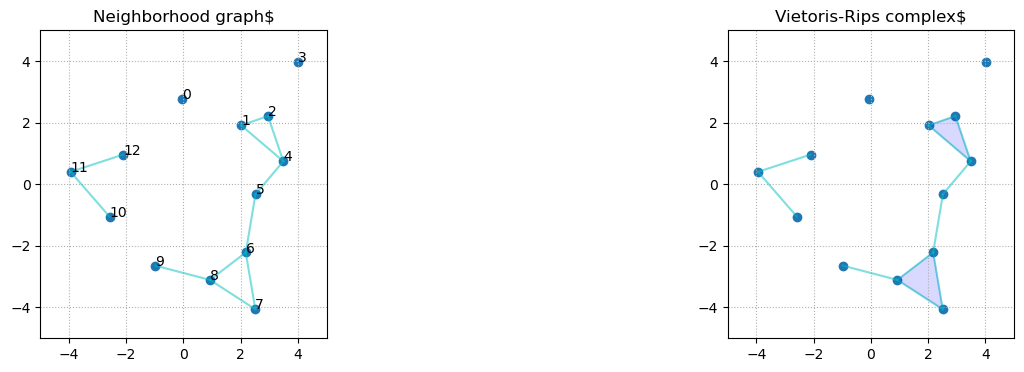

Graph with 13 nodes and 12 edges
13 2


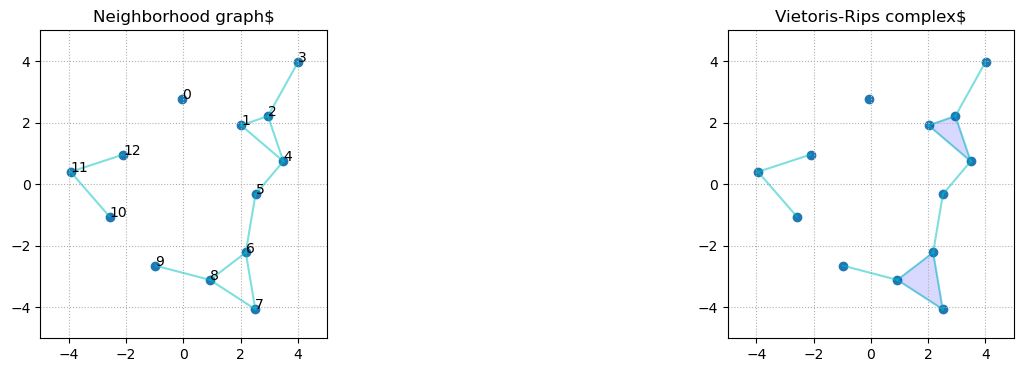

Graph with 13 nodes and 13 edges
13 2


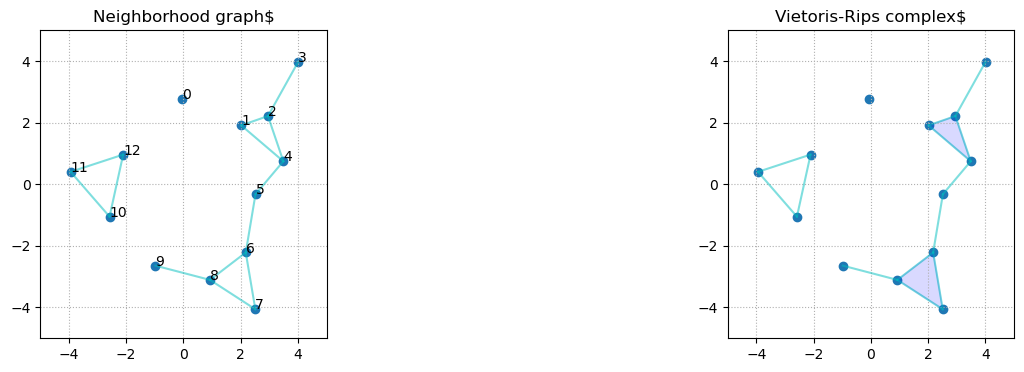

Graph with 13 nodes and 14 edges
13 2


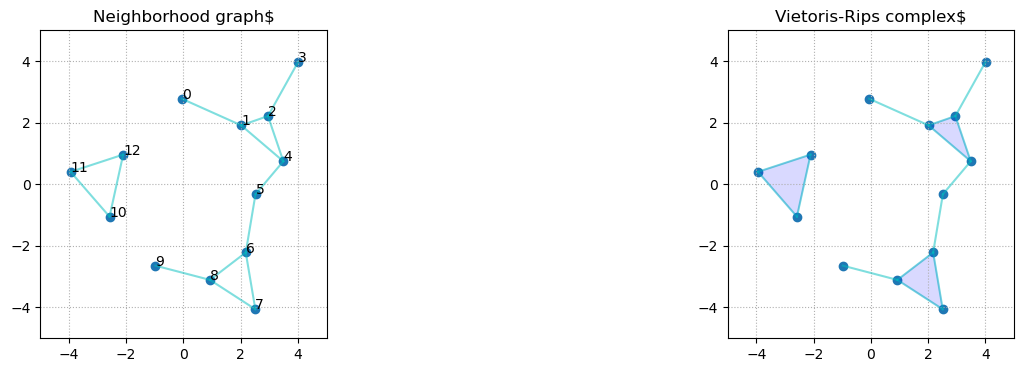

Graph with 13 nodes and 15 edges
13 2


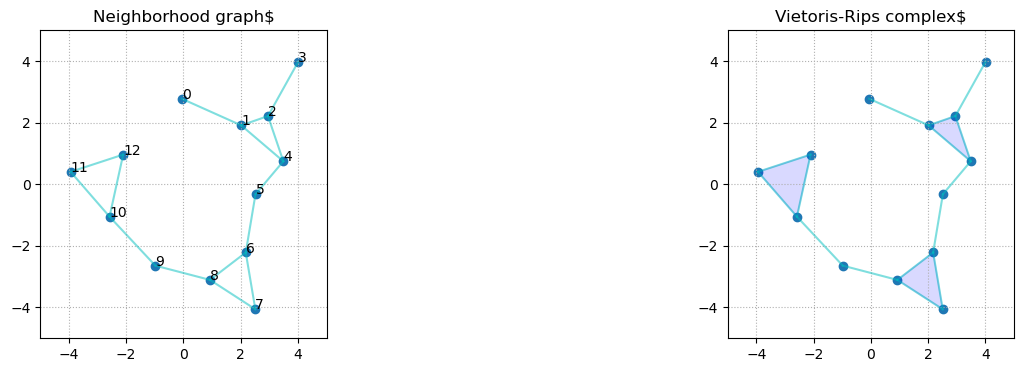

Graph with 13 nodes and 16 edges
13 2


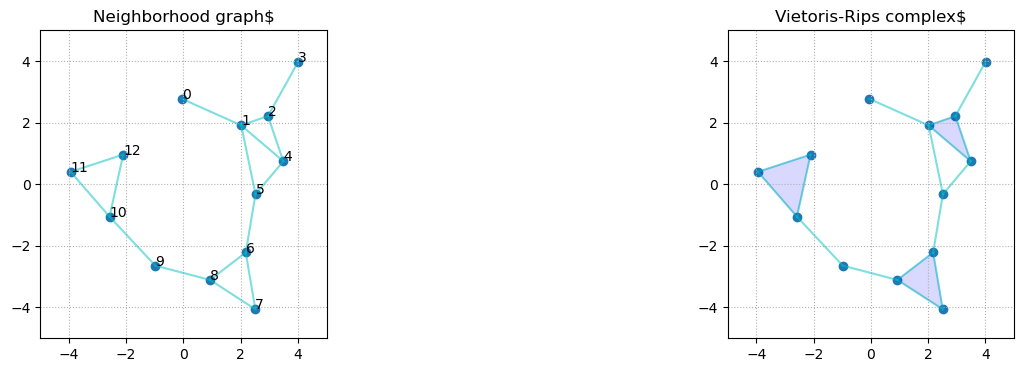

Graph with 13 nodes and 17 edges
13 2


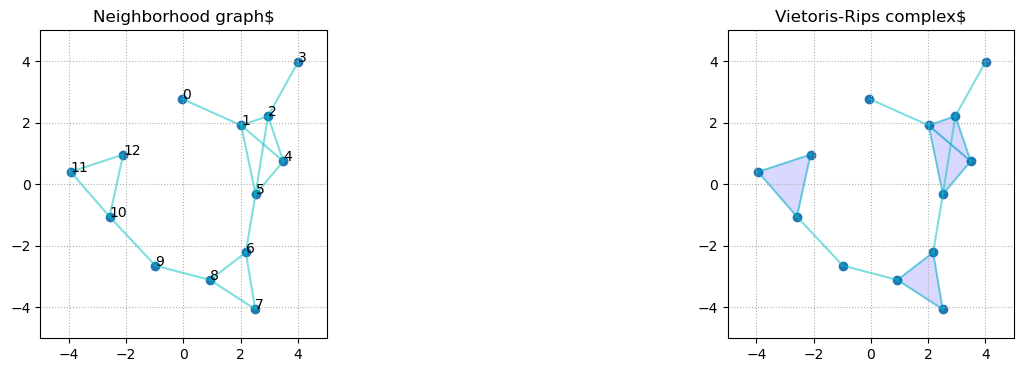

Graph with 13 nodes and 17 edges
13 2


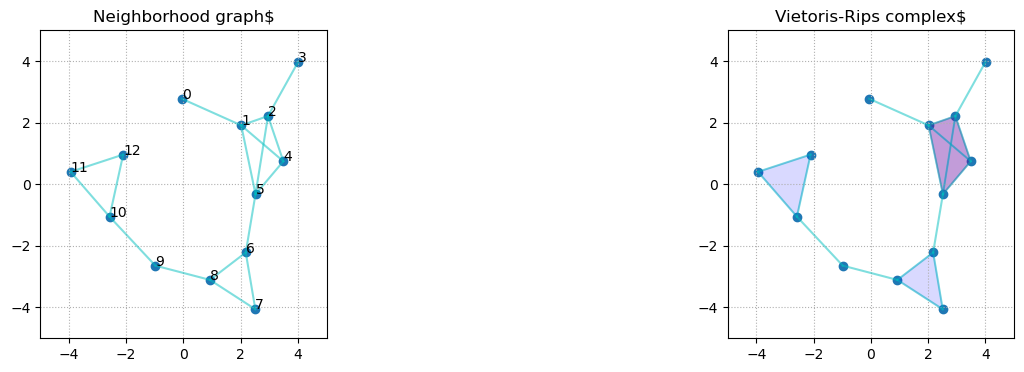

Graph with 13 nodes and 19 edges
13 2


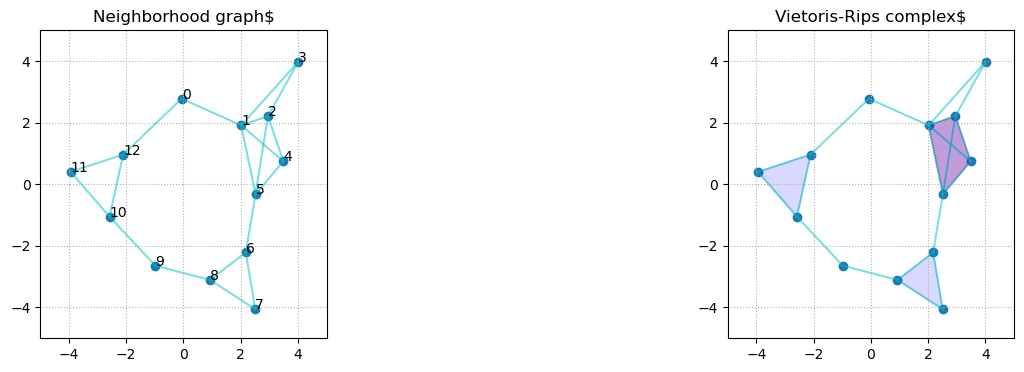

Graph with 13 nodes and 20 edges
13 2


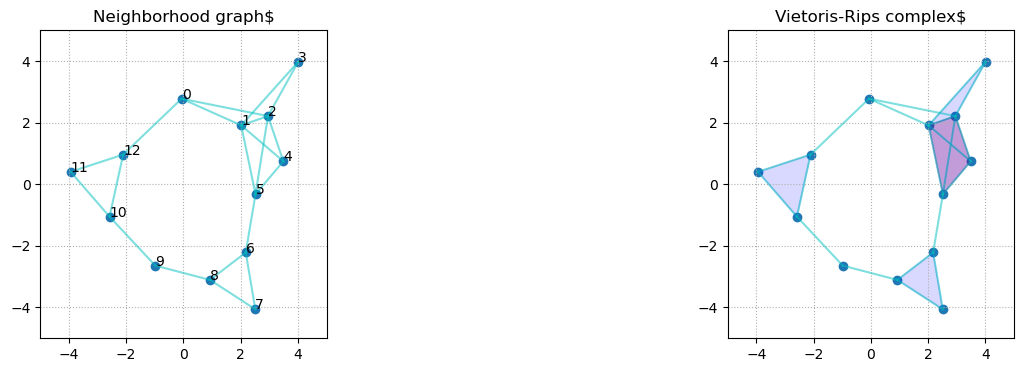

Graph with 13 nodes and 21 edges
13 2


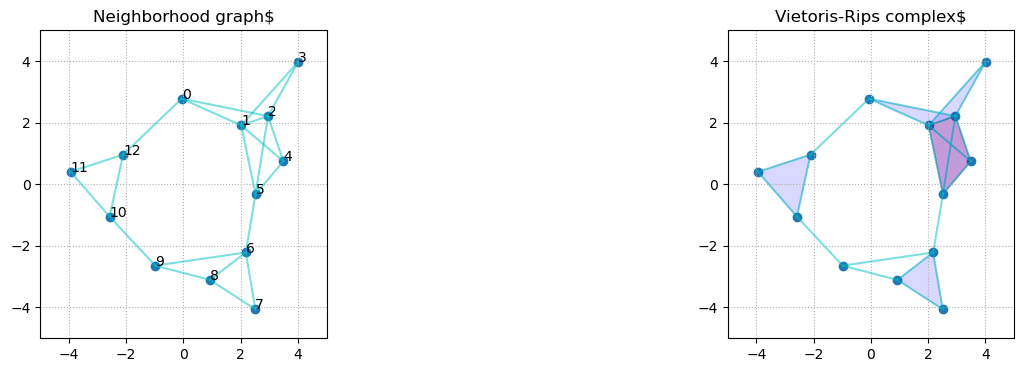

Graph with 13 nodes and 22 edges
13 2


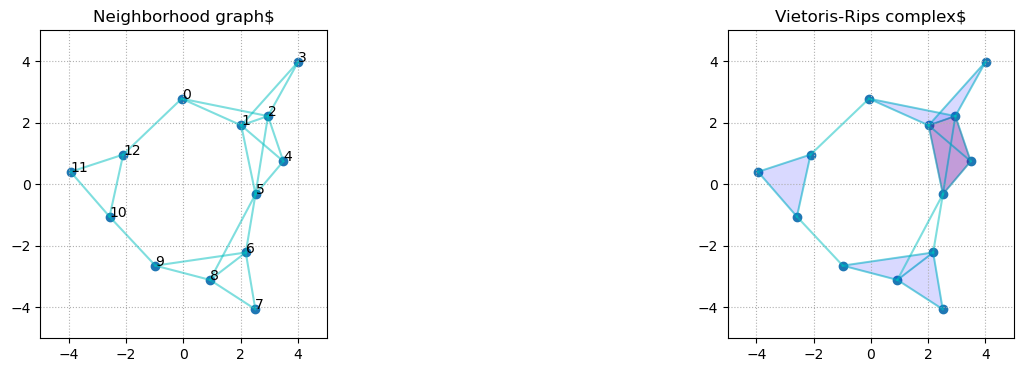

Graph with 13 nodes and 23 edges
13 2


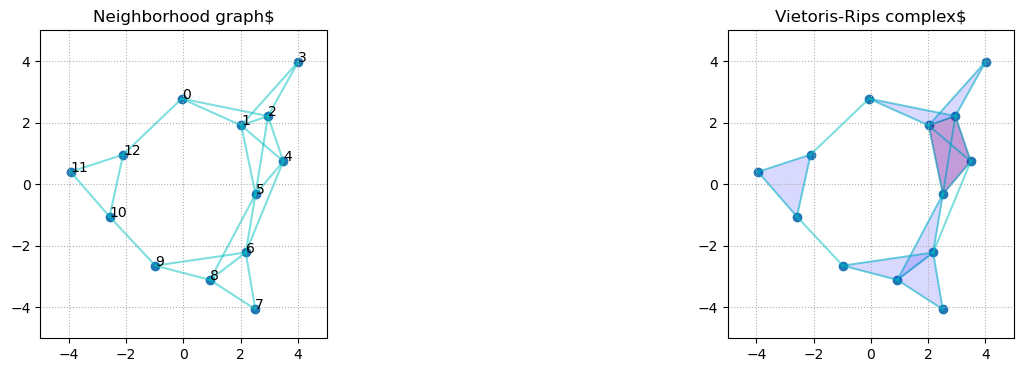

Graph with 13 nodes and 23 edges
13 2


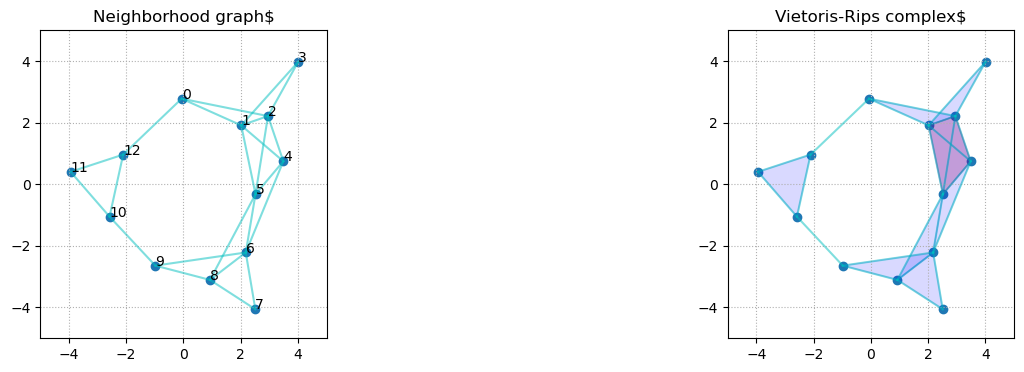

Graph with 13 nodes and 24 edges
13 2


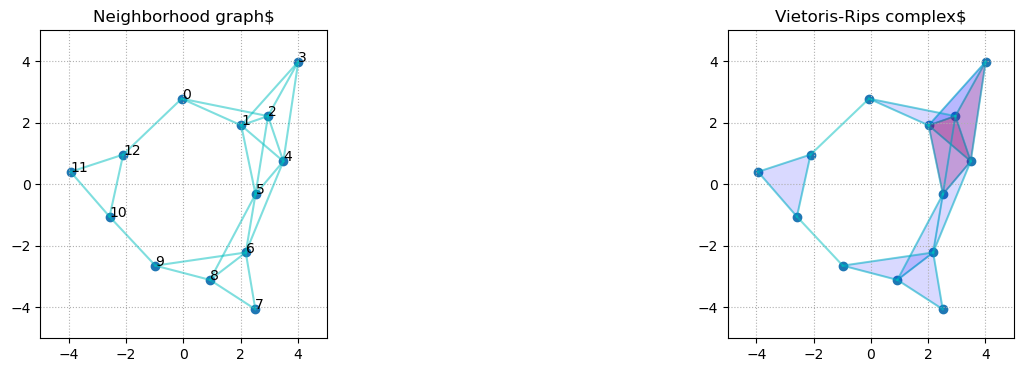

Graph with 13 nodes and 26 edges
13 2


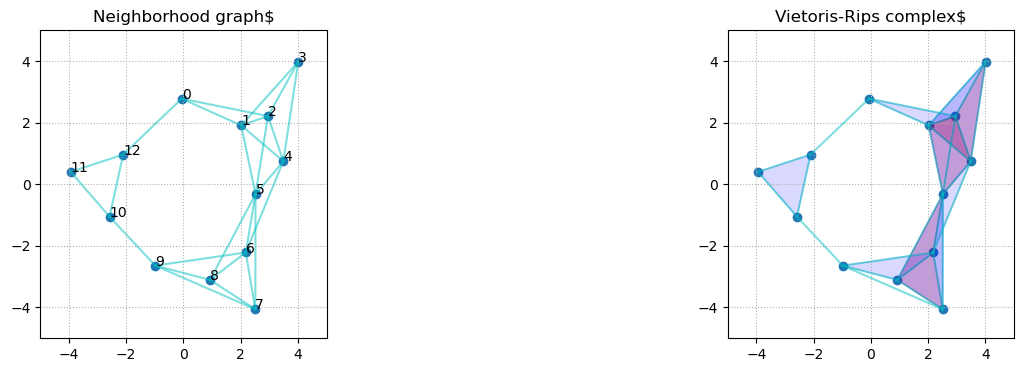

Graph with 13 nodes and 27 edges
13 2


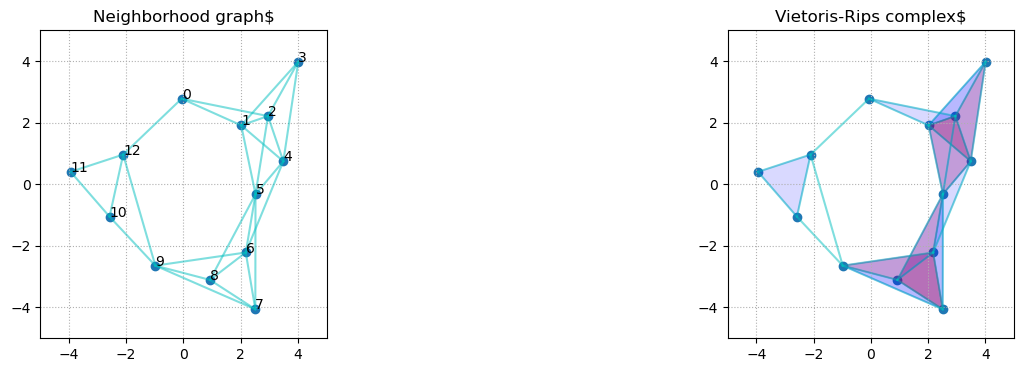

Graph with 13 nodes and 27 edges
13 2


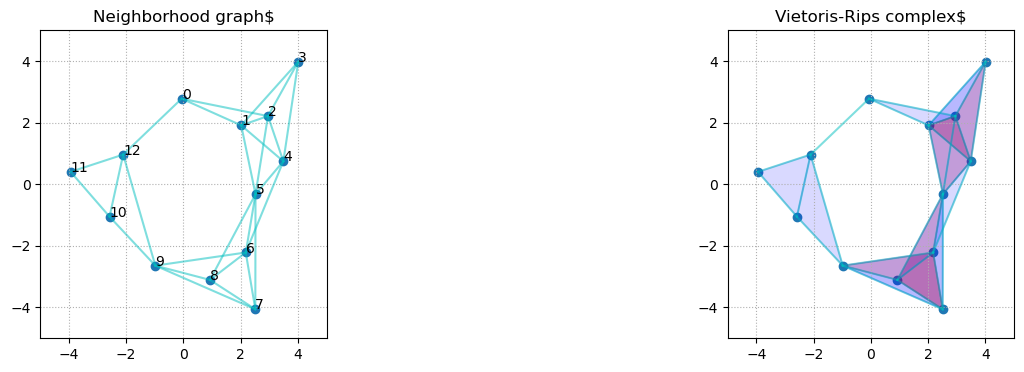

Graph with 13 nodes and 28 edges
13 2


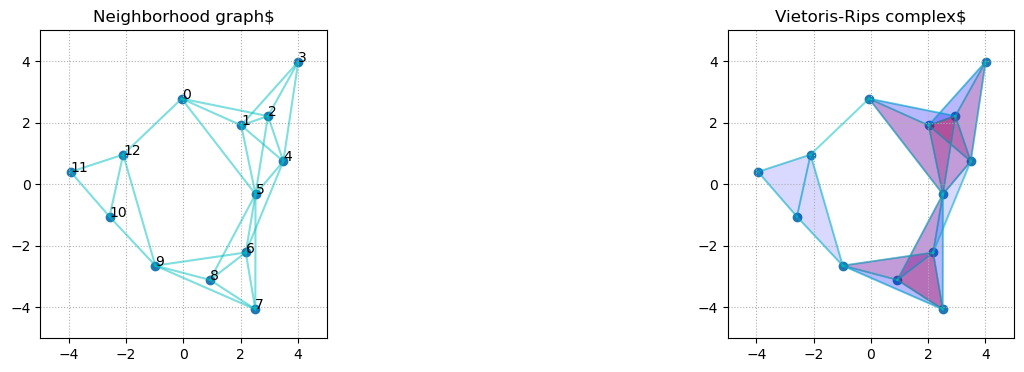

Graph with 13 nodes and 30 edges
13 2


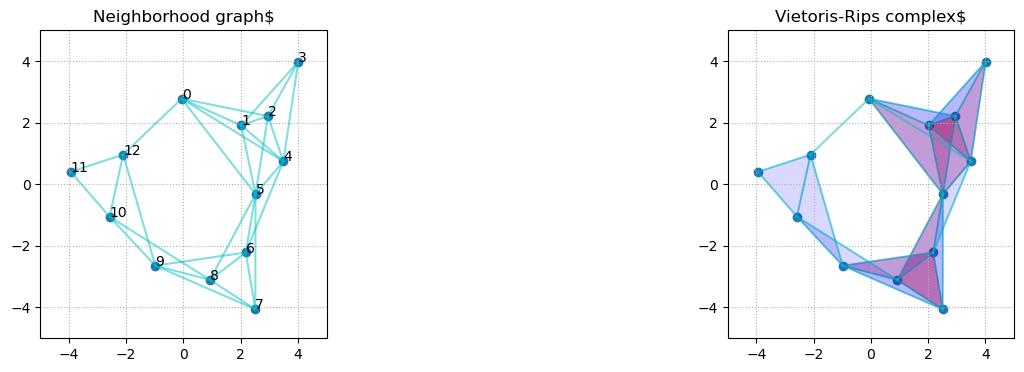

Graph with 13 nodes and 30 edges
13 2


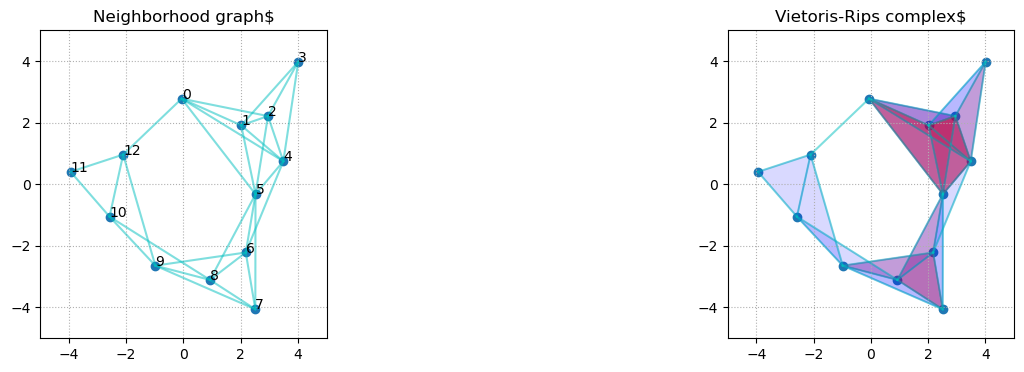

Graph with 13 nodes and 32 edges
13 2


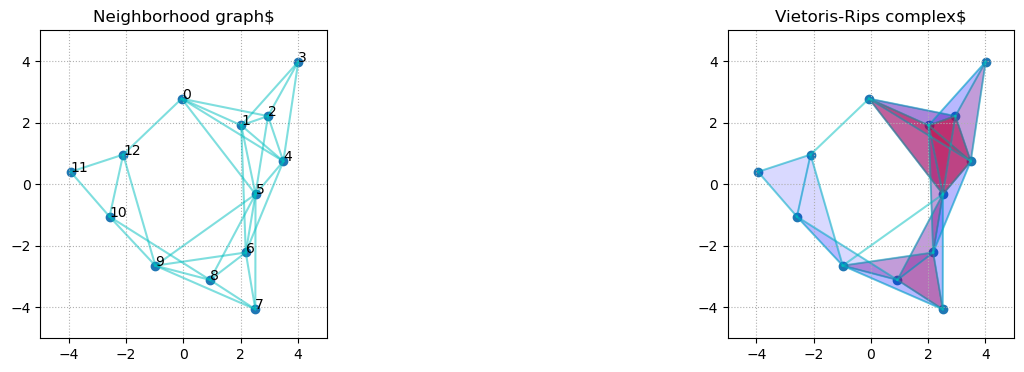

Graph with 13 nodes and 32 edges
13 2


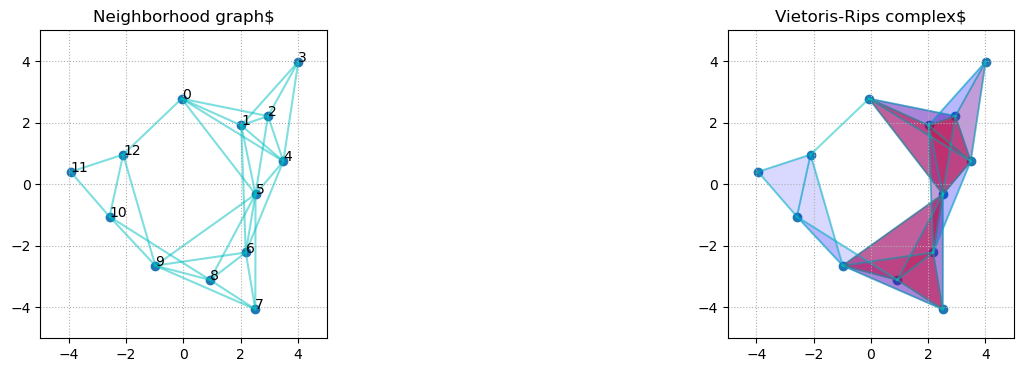

Graph with 13 nodes and 34 edges
13 2


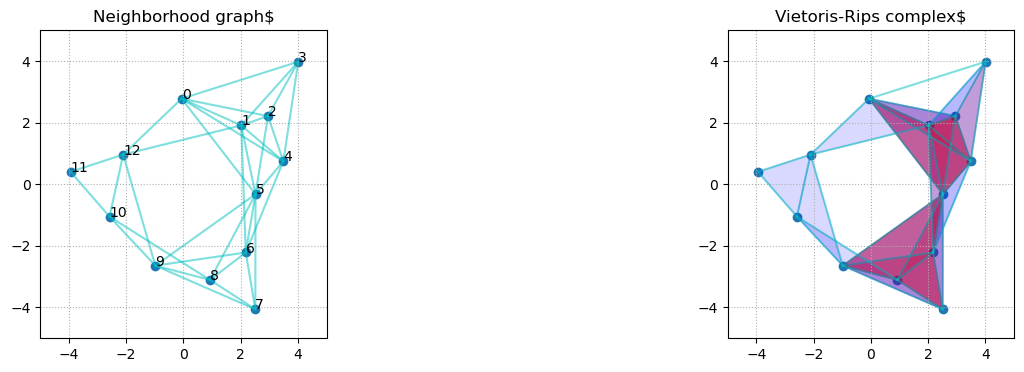

Graph with 13 nodes and 35 edges
13 2


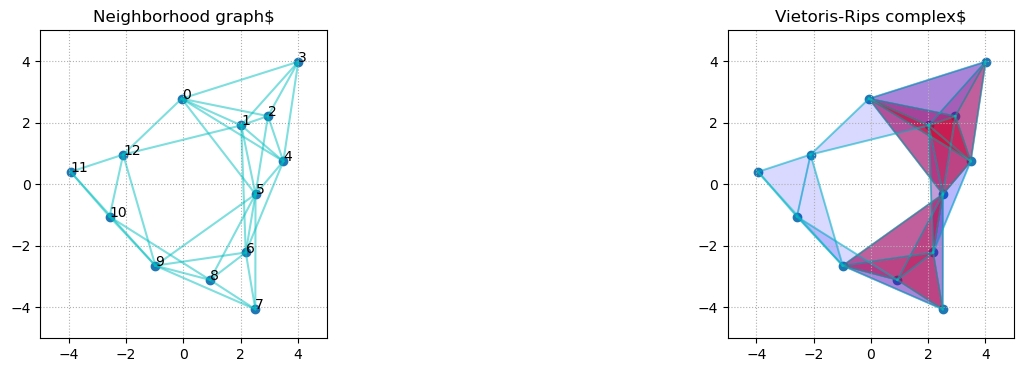

In [9]:
__K = 0

for epsilon in epsilons:
    _A = radius_neighbors_graph(X, epsilon, mode='distance', include_self=False).toarray() #.astype(int)

    _G = nx.from_numpy_array(_A)

    _M = _A.copy()
    np.fill_diagonal(_M, 1)

    print(_G)
    _A = _A.astype(np.float32)
    # __K = gf.get_VR_from_dist_matrix(_A, 4)
    __K = gf.get_VR_from_coord_matrix(X, epsilon, 4)
    _K =  __K.as_list()
    # print("Core graph V: {}".format(nx.nodes(_CG)))
    # print("Core graph E: {}".format(nx.edges(_CG)))
    # print("\r\nCore cmplx V: {}".format(_CK[0]))
    # if len(_CK) > 1:
    #     print("Core cmplx E: {}".format(_CK[1]))
    # else:
    #     print("Core cmplx E: []")
    # print("_K", _K)
    plot_core(_G, _K)
    # type(__K)
# type(__K)